# **Decision Tree Classifier to Predict Customer Purchase Behavior For Bank Marketing**

# **Problem Statement :**

The objective of this task is to build a predictive model using a Decision Tree Classifier to determine whether a customer will subscribe to a term deposit based on their demographic and behavioral attributes. The dataset used for this task is the Bank Marketing dataset from the UCI Machine Learning Repository, which includes features such as age, job type, marital status, education level, and behavioral data like communication type, number of contacts during the campaign, and campaign outcome. The model's goal is to predict the likelihood of a customer making a purchase, which can assist in crafting targeted marketing campaigns and optimizing resource allocation. The model should be evaluated on its ability to accurately classify customers who will or will not purchase a term deposit.

###**Author/Coder :**  [**Sumit Baviskar**](https://www.linkedin.com/in/sumit-baviskar/)

###**Dataset Link  :** [**Bank Marketing**](https://archive.ics.uci.edu/dataset/222/bank+marketing)

# **Introduction :**

In the highly competitive business landscape, leveraging data to refine marketing strategies and enhance customer targeting is essential for achieving sustained growth. One key challenge for businesses is predicting customer behavior, such as the likelihood of making a purchase or subscribing to a service. By applying machine learning techniques, companies can develop models that accurately forecast customer decisions, enabling them to direct their resources more efficiently and improve customer engagement.

In this context, we aim to build a **Decision Tree Classifier** to predict whether a customer will subscribe to a term deposit, using the **Bank Marketing dataset** from the UCI Machine Learning Repository. The dataset encompasses a variety of features, including demographic details (age, job, marital status, education) and behavioral patterns (communication type, campaign outcome). The goal is to utilize these variables to predict customer purchase behavior and create a model that can be effectively used for decision-making in marketing campaigns. A decision tree model is well-suited for this task due to its ability to handle both categorical and numerical data while providing transparent, interpretable results. By employing this approach, businesses can gain deeper insights into customer behavior, leading to more targeted and impactful marketing strategies.

### **Input Variables**


The **Bank Marketing dataset** includes various demographic, financial, and campaign-related features that are used to predict whether a customer will subscribe to a term deposit. Below is a summary of the input variables:

| Field          | Description                                           | Unit                | Type     |
| -------------- | ----------------------------------------------------- | ------------------- | -------- |
| **age**        | Age of the client                                     | Years               | numeric |
| **job**        | Type of job held by the client                        | N/A (categorical)   | object  |
| **marital**    | Marital status of the client                          | N/A (categorical)   | object  |
| **education**  | Educational level of the client                       | N/A (categorical)   | object  |
| **default**    | Whether the client has credit in default              | Yes/No              | binary  |
| **balance**    | Average yearly balance in euros                       | Euros               | numeric |
| **housing**    | Whether the client has a housing loan                 | Yes/No              | binary  |
| **loan**       | Whether the client has a personal loan                | Yes/No              | binary  |
| **contact**    | Type of communication used for the last contact      | N/A (categorical)   | object  |
| **day**        | Day of the last contact in the month                  | Day of the month    | numeric |
| **month**      | Month of the last contact                             | N/A (categorical)   | object  |
| **duration**   | Duration of the last contact in seconds               | Seconds             | numeric |
| **campaign**   | Number of contacts made during the current campaign   | Count               | numeric |
| **pdays**      | Number of days since the last contact from a previous campaign | Days | numeric |
| **previous**   | Number of contacts made prior to the current campaign| Count               | numeric |
| **poutcome**   | Outcome of the previous marketing campaign            | N/A (categorical)   | object  |



#### Description of Categorical Fields:
- **job**: Occupation of the client (e.g., "admin.", "unemployed", "student", etc.).

- **marital**: Marital status (e.g., "married", "divorced", "single").
- **education**: Highest level of education (e.g., "primary", "secondary", "tertiary").
- **contact**: Type of contact used in the last marketing campaign (e.g., "telephone", "cellular").
- **month**: Month of the last contact (e.g., "jan", "feb", "mar", etc.).
- **poutcome**: Outcome of the previous marketing campaign (e.g., "unknown", "success", "failure").

These input variables will be used to predict whether the client subscribed to a term deposit (the target variable **y**).
The goal of this dataset is to predict the value of **y** (whether the client subscribes to a term deposit) based on the input features provided. A Decision Tree Classifier will be built using these features to create a model that can predict customer behavior effectively.


## **Purpose:**

The purpose of this project is to build a **Decision Tree Classifier** that accurately predicts whether a customer will subscribe to a term deposit, based on their demographic, financial, and behavioral data. By analyzing customer characteristics such as age, job type, marital status, education level, financial product usage, and campaign-related interactions, the model seeks to identify patterns that drive purchase decisions. The key objectives of this project are:

1. **Predict Customer Purchase Behavior**: To accurately predict whether a customer will respond positively to a marketing campaign and subscribe to a term deposit, aiding in more effective customer segmentation and targeting.
   
2. **Identify Key Influencing Factors**: To uncover the most influential factors (e.g., age, job type, marital status, past campaign outcomes) that affect customer purchase behavior, enabling businesses to fine-tune their marketing strategies.

3. **Facilitate Data-Driven Marketing Decisions**: To provide companies with actionable insights that will help target the right audience, improving resource allocation, and enhancing overall marketing campaign performance.

4. **Optimize Customer Engagement**: By predicting the likelihood of customer purchases, the model will assist in tailoring offers and strategies that resonate with specific customer segments, increasing engagement and boosting conversion rates.

Ultimately, the project leverages machine learning to generate valuable insights that can enhance business decision-making and improve the ROI of marketing efforts.

>## **Import the required libraries**

In [15]:
# Importing necessary libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Handling numerical data
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
from plotly import tools  # Additional Plotly utilities
from sklearn import tree  # For Decision Tree algorithms
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For data preprocessing
from sklearn.tree import DecisionTreeClassifier  # For building Decision Tree model
from sklearn.pipeline import Pipeline  # For combining multiple steps into one pipeline
from sklearn.compose import ColumnTransformer  # For applying transformations to specific columns
from sklearn.metrics import accuracy_score, confusion_matrix  # For model evaluation

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/bank-full.csv")

# Display first few rows
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [22]:
# Rename the column 'y' to 'deposit'
df.rename(columns={'y': 'deposit'}, inplace=True)

# Verify the column name has been changed
print(df.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [24]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## **Data Cleaning :**

In [25]:

# Check for negative values in 'col1'
negative_values = df[df['pdays'] < 0]

if not negative_values.empty:
  print("Negative values found in 'pdays':")
  print(negative_values.head())
else:
  print("No negative values found in 'pdays'.")

Negative values found in 'pdays':
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no  


In [26]:
# Check for negative values in 'col1'
negative_values = df[df['balance'] < 0]

if not negative_values.empty:
  print("Negative values found in 'balance':")
  print(negative_values.head())
else:
  print("No negative values found in 'balance'.")

Negative values found in 'balance':
    age          job  marital  education default  balance housing loan  \
25   44       admin.  married  secondary      no     -372     yes   no   
28   46   management   single  secondary      no     -246     yes   no   
36   25  blue-collar  married  secondary      no       -7     yes   no   
37   53   technician  married  secondary      no       -3      no   no   
45   36       admin.   single    primary      no     -171     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome deposit  
25  unknown    5   may       172         1     -1         0  unknown      no  
28  unknown    5   may       255         2     -1         0  unknown      no  
36  unknown    5   may       365         1     -1         0  unknown      no  
37  unknown    5   may      1666         1     -1         0  unknown      no  
45  unknown    5   may       242         1     -1         0  unknown      no  


# **Exploratory Data Analysis**

In [27]:
df.isnull().sum().sum()

0

In [28]:
# Numerical Columns List
numerical_column=df.select_dtypes(include=['int64','float64']).columns
numerical_column

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [29]:
# Categorical Columns List
categorical_column=df.select_dtypes(exclude=['int64','float64']).columns
categorical_column_1=categorical_column[1:9]
categorical_column_1

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [30]:
col1=df.columns
col1

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [31]:
# Remove rows where 'pdays' is negative
no_pdays = df[df['pdays'] >= 0]
no_pdays

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [32]:
# Remove rows where 'pdays' is negative
new_df = no_pdays[no_pdays['balance'] >= 0]
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
24080,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [33]:
 # Selecting features and target
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome']
target = 'deposit'
X = new_df[features]
y = new_df[target]



In [34]:
new_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7769.000000,7769.000000,7769.000000,7769.000000,7769.000000,7769.000000,7769.000000
mean,41.038872,1672.928820,14.339040,260.901660,2.044665,221.143905,3.179946
std,11.573469,3118.246767,7.958318,235.549689,1.553189,115.719654,4.625057
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,230.000000,7.000000,113.000000,1.000000,126.000000,1.000000
50%,38.000000,680.000000,14.000000,195.000000,2.000000,189.000000,2.000000
75%,48.000000,1854.000000,20.000000,324.000000,2.000000,322.000000,4.000000
max,93.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


In [35]:
new_df_1 = new_df[new_df['poutcome'] != 'unknown']
y_1=pd.DataFrame(new_df_1['deposit'].map({'yes': 1, 'no': 0}))
new_df_1.head()
y_1.astype(int)


,deposit
24060,0
24064,1
24072,0
24077,1
24080,1
...,...
45199,0
45201,1
45204,1
45208,1


# **Demographic And Behavioral Pattern Of Customer**

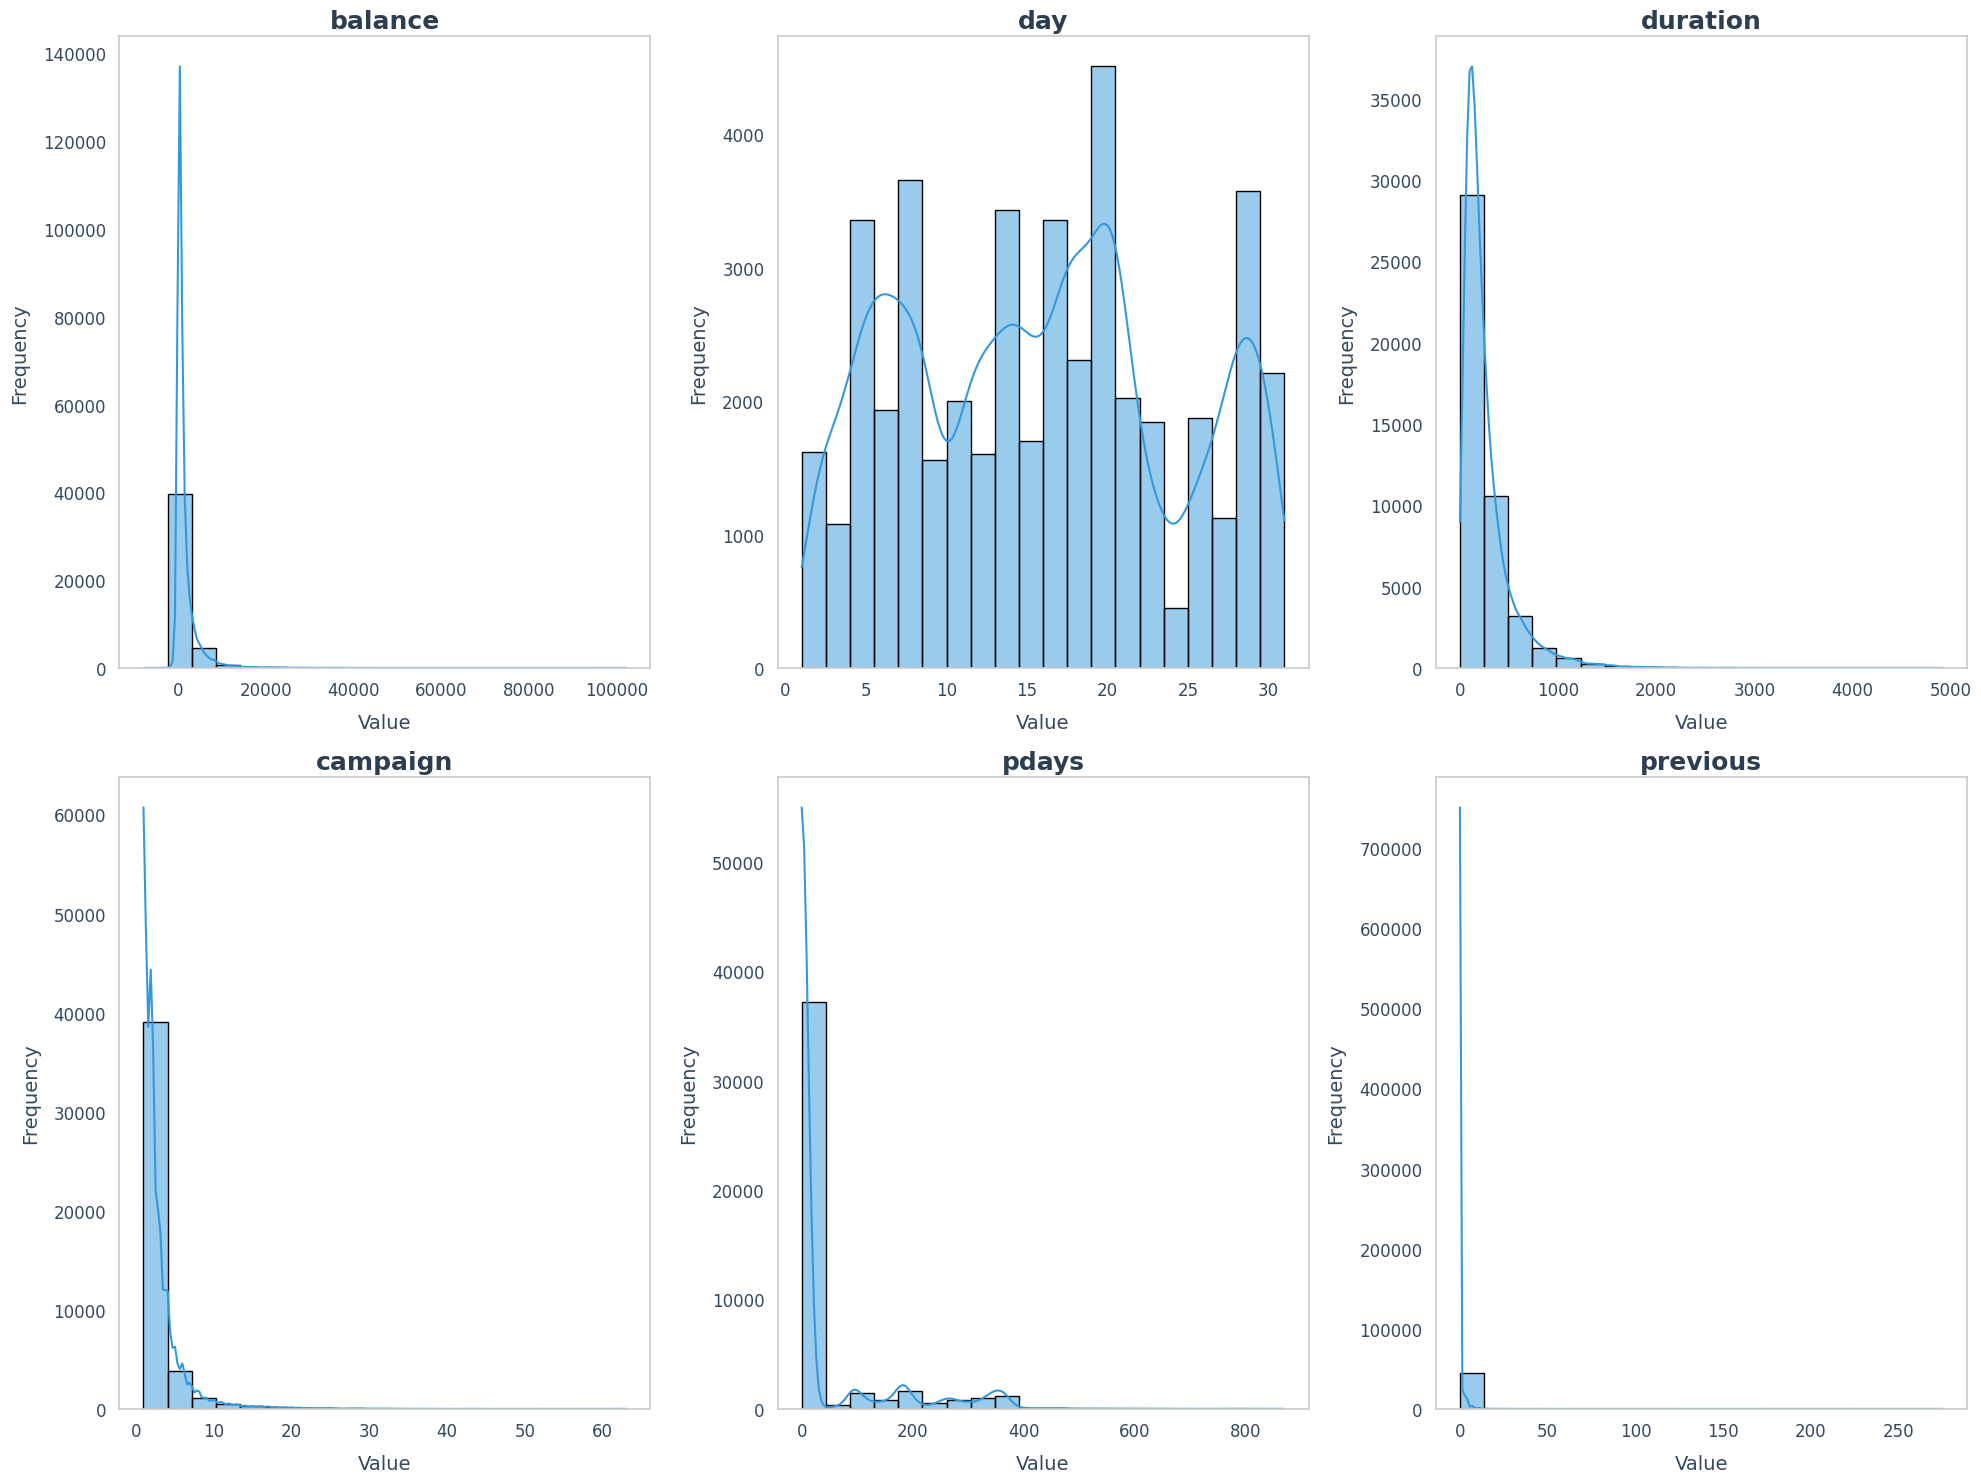

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the Seaborn style to a more professional look
sns.set(style="whitegrid", palette="muted")

# List of numeric columns
num_columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Create a 2x3 grid for subplots with shared axes
fig, axs = plt.subplots(2, 3, figsize=(20, 15))  # Adjust the size of the figure

# Counter to keep track of the subplot position
counter = 0

# Loop through each numeric column
for num_column in num_columns:

    # Determine the subplot position
    trace_x = counter // 3  # Row index
    trace_y = counter % 3   # Column index

    # Plot histogram using seaborn's histplot with edge color for better contrast
    sns.histplot(df[num_column], bins=20, kde=True, color='#3498db', edgecolor='black', ax=axs[trace_x, trace_y])

    # Set the title for the subplot (bold font)
    axs[trace_x, trace_y].set_title(num_column, fontsize=18, fontweight='bold', color='#2c3e50')

    # Set x and y axis labels with professional formatting
    axs[trace_x, trace_y].set_xlabel('Value', fontsize=14, color='#34495e', labelpad=10)
    axs[trace_x, trace_y].set_ylabel('Frequency', fontsize=14, color='#34495e', labelpad=10)

    # Adjust tick labels font size and color
    axs[trace_x, trace_y].tick_params(axis='x', labelsize=12, colors='#34495e')
    axs[trace_x, trace_y].tick_params(axis='y', labelsize=12, colors='#34495e')

    # Remove grid lines for a cleaner look
    axs[trace_x, trace_y].grid(False)

    # Increment the counter to move to the next subplot
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


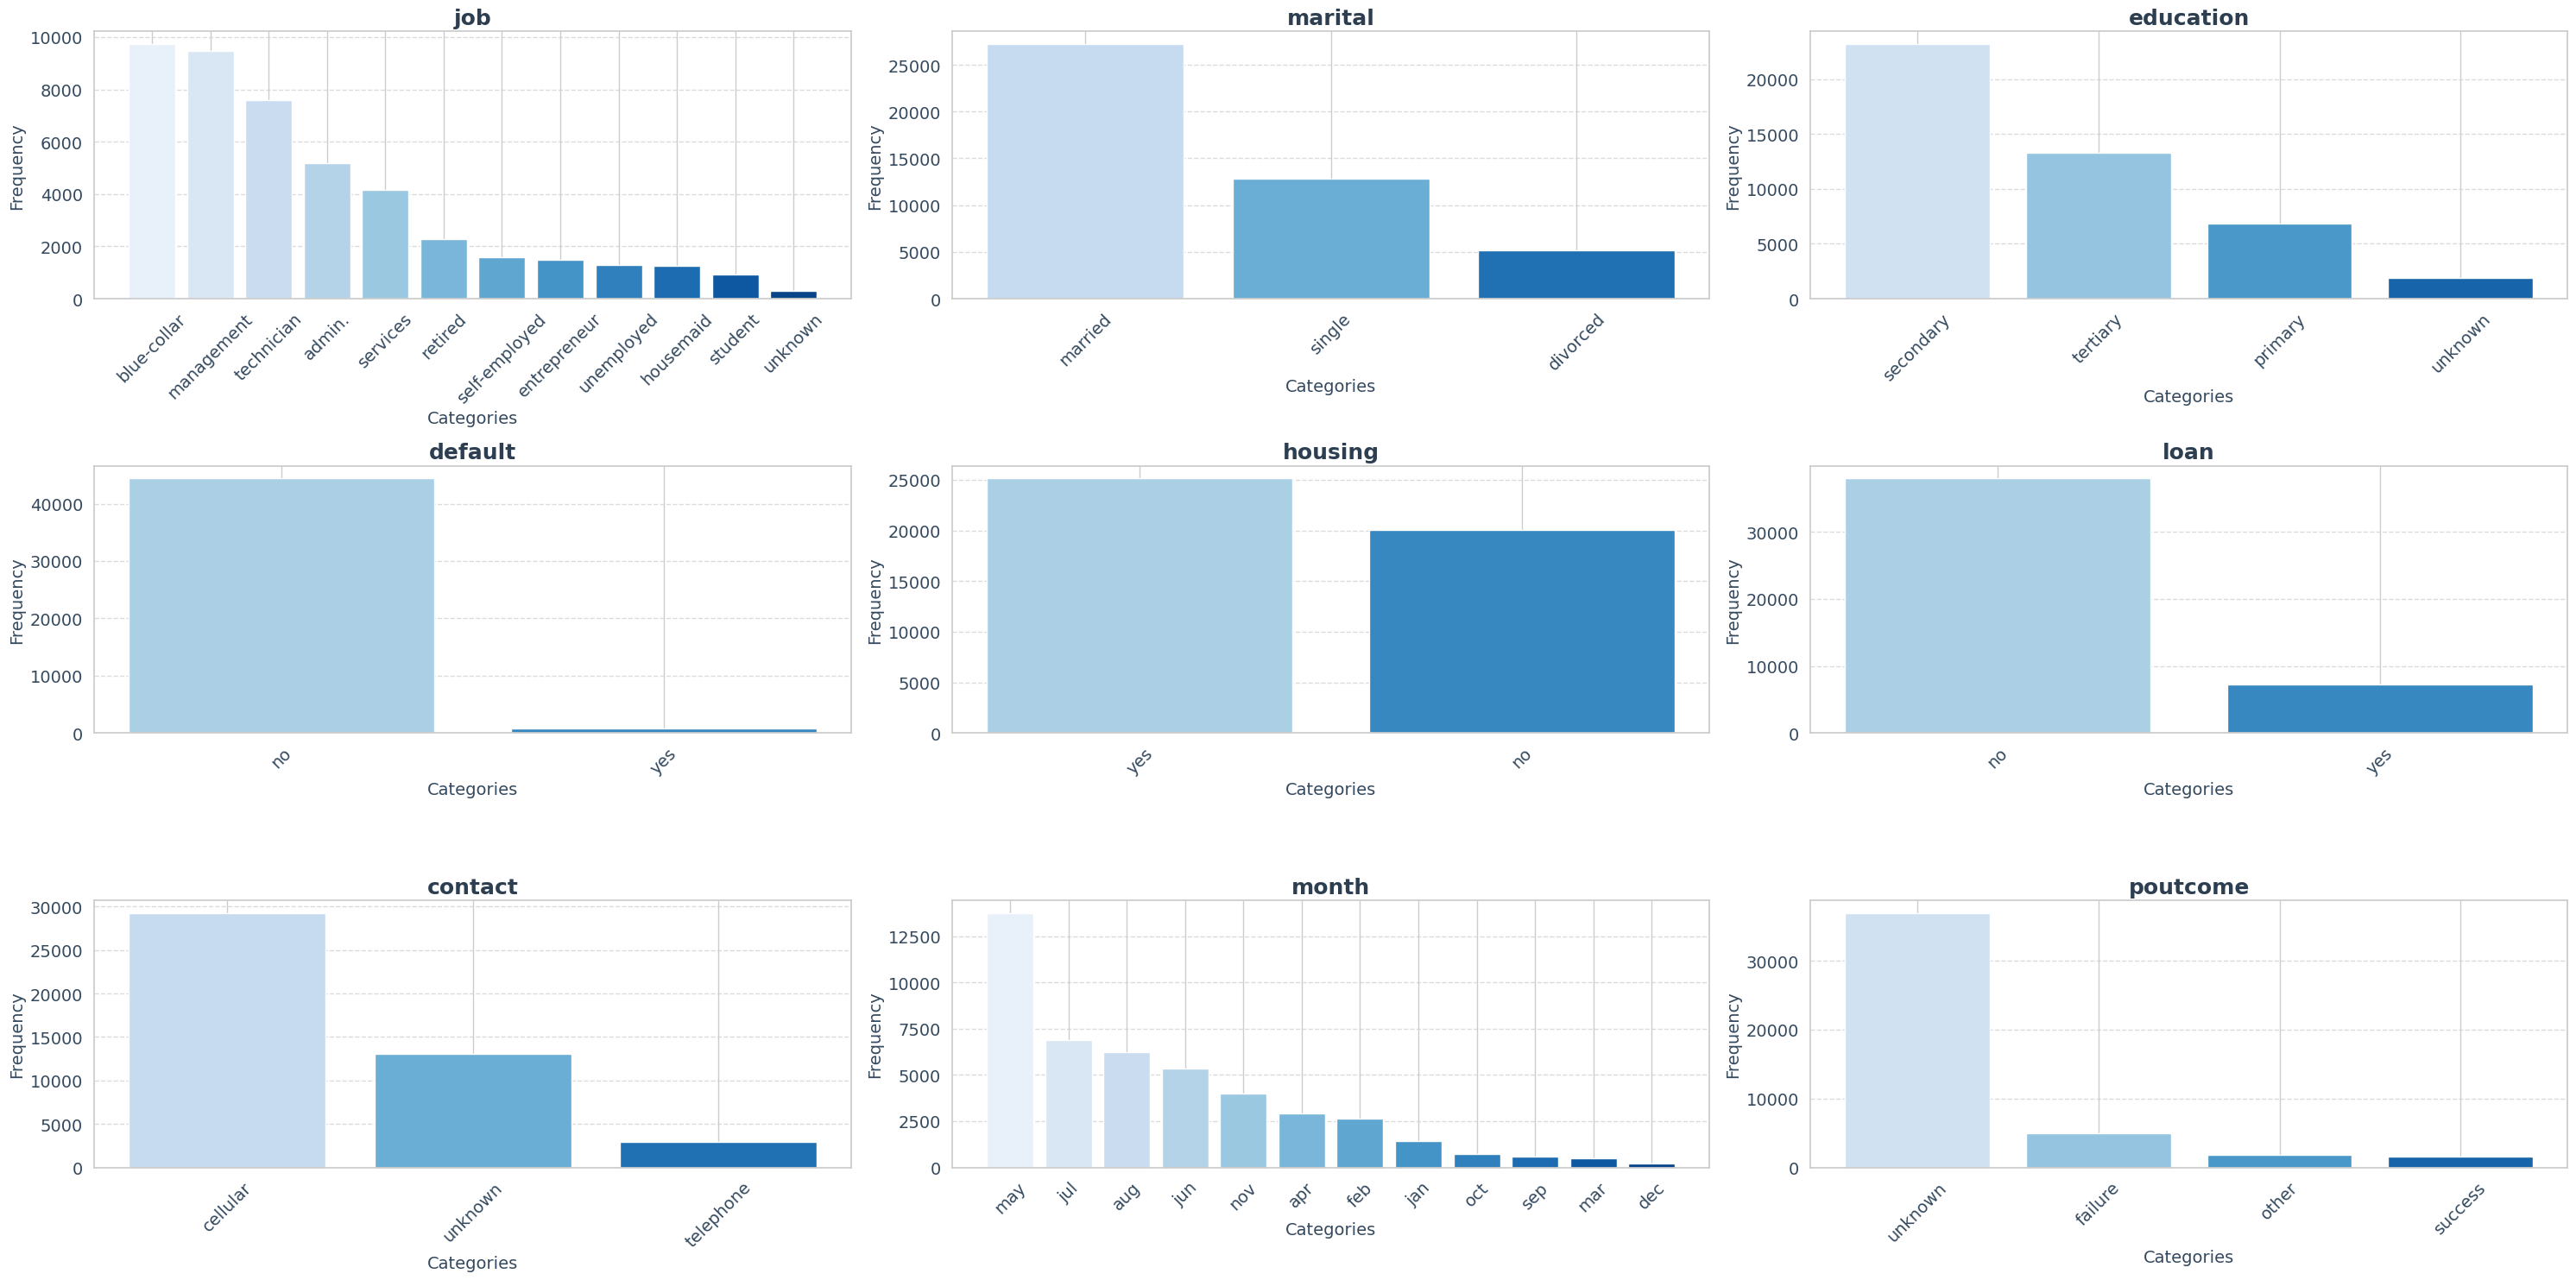

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the Seaborn style for a more professional look
sns.set(style="whitegrid", palette="muted")

# List of categorical columns
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create a 3x3 grid for subplots with shared axes
fig, axs = plt.subplots(3, 3, figsize=(30, 15))  # Adjust the size of the figure

# Counter to keep track of the position in the grid
counter = 0

# Loop through each categorical column
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()

    # Determine the subplot position based on the counter
    trace_x = counter // 3  # Row index
    trace_y = counter % 3   # Column index

    # Define a color palette with more subtle tones
    colors = sns.color_palette("Blues", len(value_counts))  # Subtle blue tones

    # Plot the bar chart with the custom color palette
    x_pos = np.arange(len(value_counts))
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label=value_counts.index, color=colors)

    # Set the title for the subplot with bold formatting and improved readability
    axs[trace_x, trace_y].set_title(cat_column, fontsize=18, fontweight='bold', color='#2c3e50')

    # Rotate x-axis labels for better readability
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(45)

    # Increase the font size for the labels
    axs[trace_x, trace_y].tick_params(axis='x', labelsize=14, colors='#34495e')
    axs[trace_x, trace_y].tick_params(axis='y', labelsize=14, colors='#34495e')

    # Add subtle gridlines only on the y-axis for better clarity
    axs[trace_x, trace_y].grid(True, axis='y', linestyle='--', alpha=0.7)

    # Add axis labels with professional formatting
    axs[trace_x, trace_y].set_xlabel('Categories', fontsize=14, color='#34495e')
    axs[trace_x, trace_y].set_ylabel('Frequency', fontsize=14, color='#34495e')

    # Increment the counter to move to the next subplot
    counter += 1

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


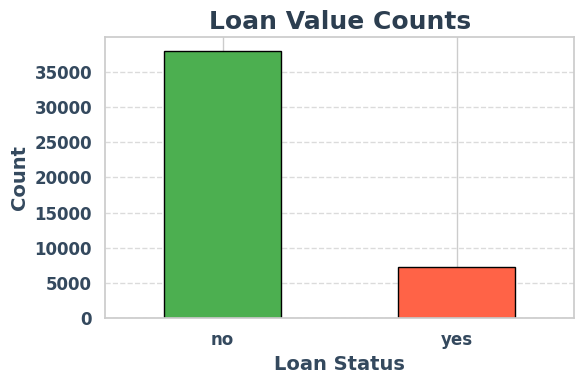

In [39]:
import matplotlib.pyplot as plt

# Get the value counts for the 'loan' column
value_counts = df['loan'].value_counts()

# Plotting the bar chart with customized figure size and title
plt.figure(figsize=(6, 4))  # Adjust the size (width=6, height=4)

# Choose a more refined color scheme
value_counts.plot.bar(color=['#4CAF50', '#FF6347'], edgecolor='black')  # Green for 'yes' and Tomato Red for 'no'

# Customize plot elements
plt.title('Loan Value Counts', fontsize=18, fontweight='bold', color='#2c3e50')  # Title with bold font and dark color
plt.xlabel('Loan Status', fontsize=14, fontweight='bold', color='#34495e')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#34495e')

# Adjust the appearance of ticks
plt.xticks(rotation=0, fontsize=12, fontweight='bold', color='#34495e')  # Horizontal x-axis labels with bold font
plt.yticks(fontsize=12, fontweight='bold', color='#34495e')  # y-axis ticks with bold font

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Tight layout to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()


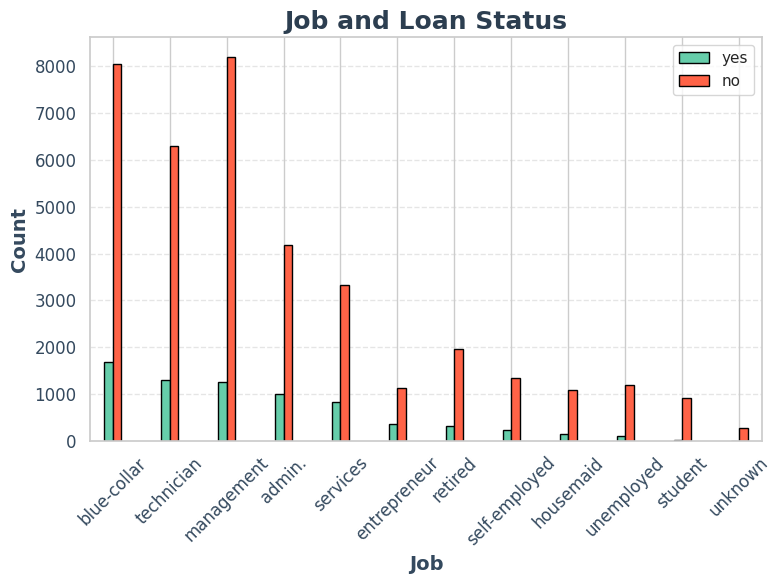

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame for job status counts based on loan status
j_df = pd.DataFrame()
j_df['yes'] = df[df['loan'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['loan'] == 'no']['job'].value_counts()

# Set up the figure with a fixed size
fig, ax = plt.subplots(figsize=(8, 6))  # Adjusted figure size for better visualization

# Create the bar plot with a custom color palette (using a palette from Seaborn)
j_df.plot.bar(ax=ax, width=0.3, color=['#66CDAA', '#FF6347'], edgecolor='black')  # Teal for 'yes' and Tomato Red for 'no'

# Customize plot elements
ax.set_title('Job and Loan Status', fontsize=18, fontweight='bold', color='#2c3e50')  # Title with professional styling
ax.set_xlabel('Job', fontsize=14, fontweight='bold', color='#34495e')  # Axis labels with gray color
ax.set_ylabel('Count', fontsize=14, fontweight='bold', color='#34495e')  # Axis labels with gray color

# Adjust tick parameters for readability
ax.tick_params(axis='x', labelrotation=45, labelsize=12, colors='#34495e')  # Rotate x-axis labels with legible font size
ax.tick_params(axis='y', labelsize=12, colors='#34495e')  # Y-axis ticks with consistent styling

# Add gridlines for better readability, focusing only on the y-axis
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Ensure tight layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()


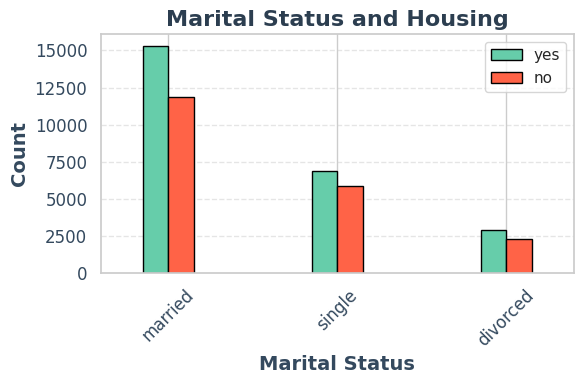

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame for marital status counts based on housing status
j_df = pd.DataFrame()

j_df['yes'] = df[df['housing'] == 'yes']['marital'].value_counts()
j_df['no'] = df[df['housing'] == 'no']['marital'].value_counts()

# Set up the figure with a fixed size
fig, ax = plt.subplots(figsize=(6, 4))  # Adjusted figure size

# Create the bar plot with a refined color palette
j_df.plot.bar(ax=ax, width=0.3, color=['#66CDAA', '#FF6347'], edgecolor='black')  # Teal for 'yes' and Tomato Red for 'no'

# Customize plot elements
ax.set_title('Marital Status and Housing', fontsize=16, fontweight='bold', color='#2c3e50')  # Title with bold font and professional color
ax.set_xlabel('Marital Status', fontsize=14, fontweight='bold', color='#34495e')  # Bold x-axis label with gray color
ax.set_ylabel('Count', fontsize=14, fontweight='bold', color='#34495e')  # Bold y-axis label with gray color

# Adjust tick parameters for better readability
ax.tick_params(axis='x', labelrotation=45, labelsize=12, colors='#34495e')  # Rotate x-axis labels with bold font
ax.tick_params(axis='y', labelsize=12, colors='#34495e')  # Y-axis ticks with consistent styling

# Add subtle gridlines for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Ensure tight layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()


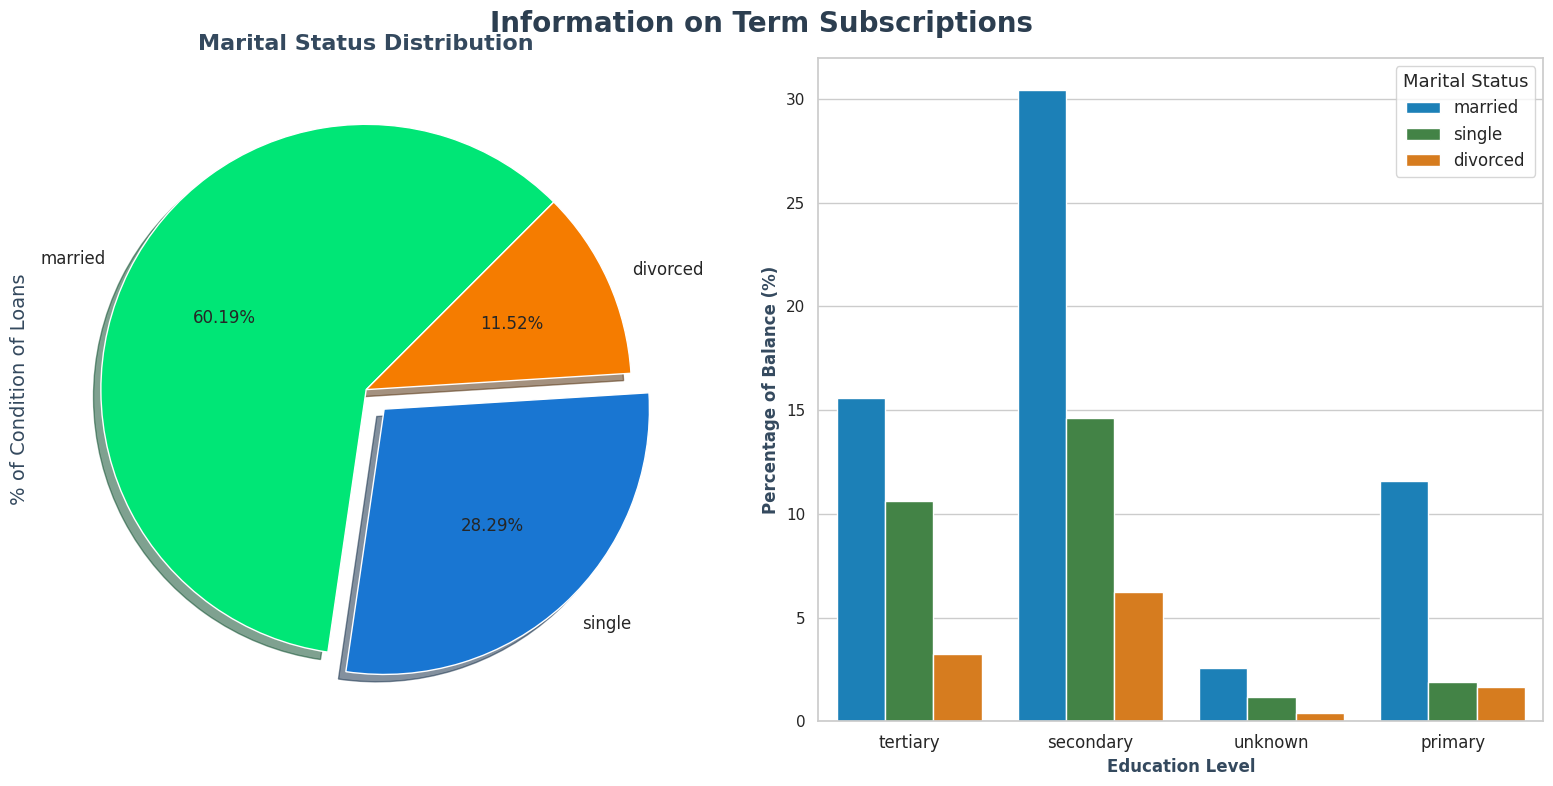

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(16, 8))

# New color palette for pie chart
pie_colors = ["#00E676", "#1976d2", "#f57c00"]  # green, Blue, Light Orange
labels = "married", "single", "divorced"

plt.suptitle('Information on Term Subscriptions', fontsize=20, fontweight='bold', color='#2c3e50')

# Plotting the pie chart using Matplotlib
df["marital"].value_counts().plot.pie(
    explode=[0, 0.1, 0],  # Added a third value to explode for the third category
    autopct='%1.2f%%',
    ax=ax[0],
    shadow=True,
    colors=pie_colors,
    labels=labels,
    fontsize=12,
    startangle=45
)

ax[0].set_ylabel('% of Condition of Loans', fontsize=14, color='#34495e')  # Bold and gray label for contrast
ax[0].set_title('Marital Status Distribution', fontsize=16, fontweight='bold', color='#34495e')  # Title for pie chart

# New color palette for bar plot
bar_palette = ["#0288d1", "#388e3c", "#f57c00"]  # Blue, Green, Orange

sns.barplot(
    x="education",
    y="balance",
    hue="marital",
    data=df,
    palette=bar_palette,  # Using new colors
    estimator=lambda x: len(x) / len(df) * 100,
    ax=ax[1]
)

# Customizing the second plot
ax[1].set_xlabel("Education Level", fontweight='bold', color='#34495e')
ax[1].set_ylabel("Percentage of Balance (%)", fontweight='bold', color='#34495e')
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor", fontsize=12)
ax[1].legend(title='Marital Status', title_fontsize='13', fontsize='12', loc='upper right')

# Improve layout for presentation
plt.tight_layout()
plt.show()


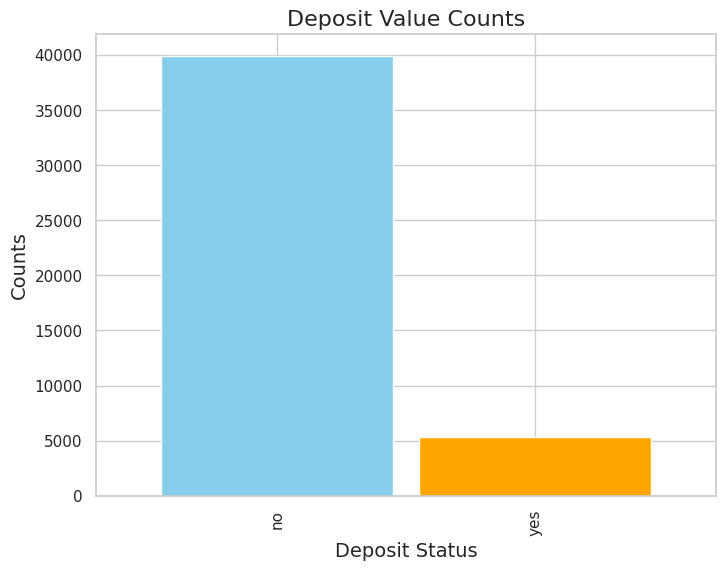

In [48]:
value_counts = df['deposit'].value_counts()

# Create a larger figure with controlled bar size
plt.figure(figsize=(8, 6))  # Adjust width and height as needed
value_counts.plot.bar(title='Deposit Value Counts', width=0.9, color=['skyblue', 'orange'])
plt.title('Deposit Value Counts', fontsize=16)  # Increase title size
plt.xlabel('Deposit Status', fontsize=14)
plt.ylabel('Counts', fontsize=14)

plt.show()


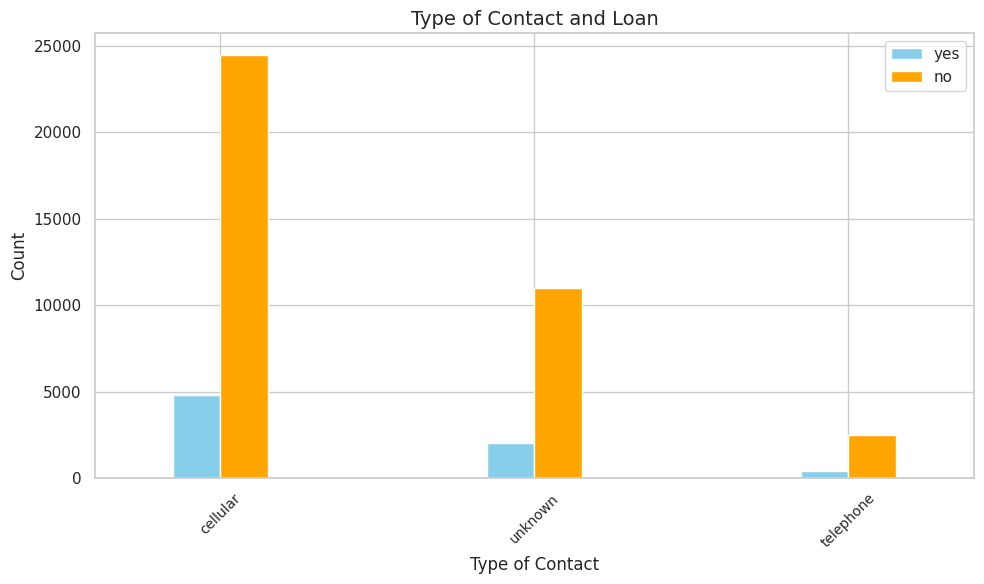

In [49]:

# Prepare data
j_df = pd.DataFrame()
j_df['yes'] = df[df['loan'] == 'yes']['contact'].value_counts()
j_df['no'] = df[df['loan'] == 'no']['contact'].value_counts()

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))  # Fixed figure size

# Create the bar plot
j_df.plot.bar(ax=ax, width=0.3, color=['skyblue', 'orange'])

# Customize plot elements
ax.set_title('Type of Contact and Loan', fontsize=14)
ax.set_xlabel('Type of Contact', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', labelrotation=45, labelsize=10)

# Ensure layout is tight
plt.tight_layout()

# Display the plot
plt.show()


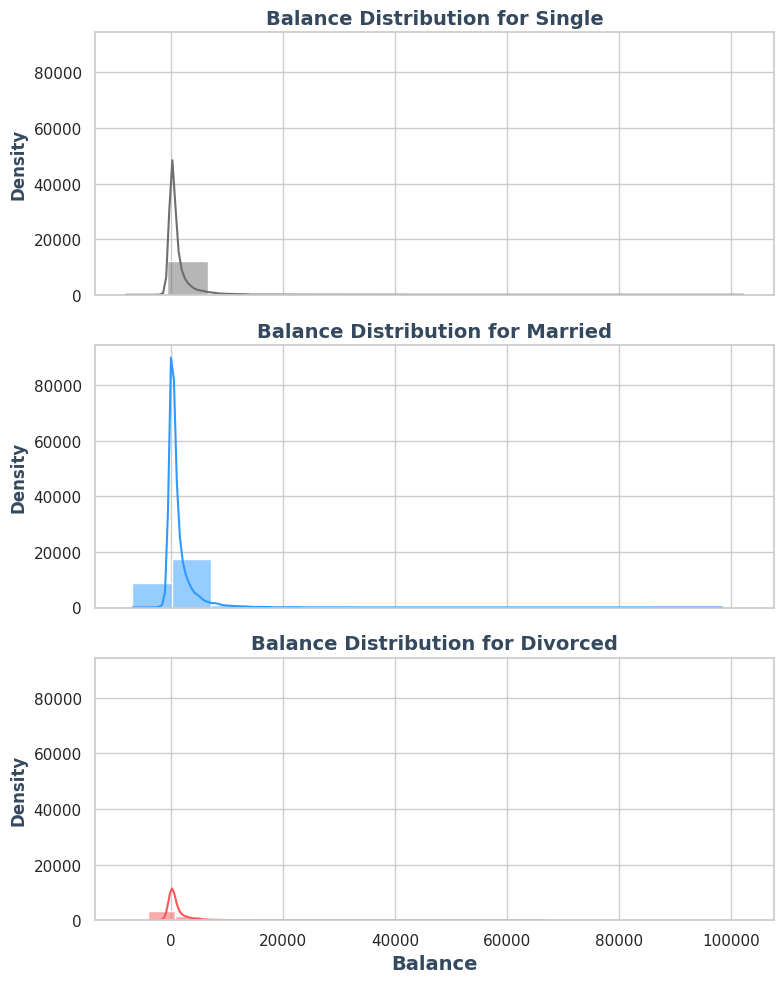

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for distribution of balances by marital status
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True, sharey=True)

# Data for each marital status
single = df['balance'].loc[df['marital'] == 'single']
married = df['balance'].loc[df['marital'] == 'married']
divorced = df['balance'].loc[df['marital'] == 'divorced']

# Plot for 'single' marital status
sns.histplot(single, kde=True,bins=15, color='#6E6E6E', ax=axes[0])
axes[0].set_title('Balance Distribution for Single', fontsize=14, fontweight='bold', color='#34495e')
axes[0].set_ylabel('Density', fontsize=12, fontweight='bold', color='#34495e')

# Plot for 'married' marital status
sns.histplot(married, kde=True,bins=15, color='#2E9AFE', ax=axes[1])
axes[1].set_title('Balance Distribution for Married', fontsize=14, fontweight='bold', color='#34495e')
axes[1].set_ylabel('Density', fontsize=12, fontweight='bold', color='#34495e')

# Plot for 'divorced' marital status
sns.histplot(divorced, kde=True,bins=15, color='#FA5858', ax=axes[2])
axes[2].set_title('Balance Distribution for Divorced', fontsize=14, fontweight='bold', color='#34495e')
axes[2].set_ylabel('Density', fontsize=12, fontweight='bold', color='#34495e')

# Adjust x-axis label
axes[2].set_xlabel('Balance', fontsize=14, fontweight='bold', color='#34495e')

# Improve layout for presentation
plt.tight_layout()

# Show the plot
plt.show()


In [58]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'


df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,marital/education
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,married/tertiary
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,single/secondary
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,married/secondary
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,NaN
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,NaN


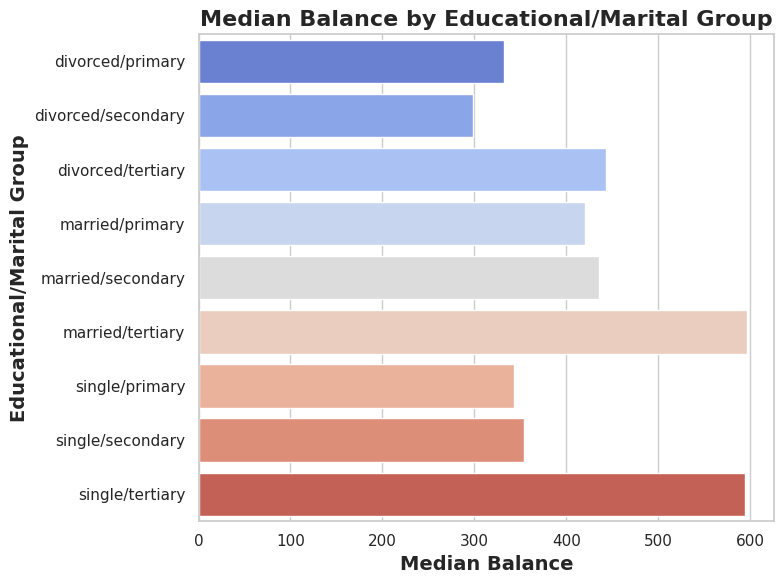

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by marital status and education, calculating the median balance
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

# Set up the figure size
fig = plt.figure(figsize=(8,6))

# Plotting with a new color palette
sns.barplot(
    x="balance",
    y="marital/education",
    data=education_groups,
    label="Total",
    palette="coolwarm"  # Change the color palette to 'coolwarm'
)

# Title and label customizations
plt.title('Median Balance by Educational/Marital Group', fontsize=16, fontweight='bold')
plt.xlabel('Median Balance', fontsize=14, fontweight='bold')
plt.ylabel('Educational/Marital Group', fontsize=14, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


 #  **Insight**

**1. Major Loan Holders:**

 Blue Collar Workers, Technicians, and Management are the major holders of loans.


**2.Marital Status and Housing:**

Married Customers have a higher proportion of housing loans compared to Single
and Divorced individuals.


**3.Information on Term Subscriptions:**

60% of term subscriptions are bought by Married Customers.


**4.Education and Marital Status Effect on Term Subscriptions:**

Married customers with Secondary Education are more likely to accept term subscriptions compared to Single individuals or those with lower educational levels.


**5.Balance vs. Educational/Marital Status:**


Customers with Higher Education have the highest balances, followed by those with Secondary Education.

# **Model Building**

In [85]:
x,y=new_df_1.iloc[:,0:16],y_1

In [86]:
x.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure
24080,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success


In [87]:
y.head(5)

,deposit
24060,0
24064,1
24072,0
24077,1
24080,1


In [88]:
new_df_1.shape

(7764, 17)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(new_df_1.iloc[:,0:16],y_1, test_size=0.2, random_state=10)

In [90]:
print(x_train.shape)
x_train.head()

(6211, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
43296,82,retired,divorced,primary,no,0,no,no,telephone,15,mar,506,2,195,1,other
39677,26,admin.,single,secondary,no,2509,no,no,cellular,27,may,776,3,97,3,success
34630,53,services,married,primary,no,171,yes,yes,cellular,5,may,343,4,167,6,other
37221,44,blue-collar,married,primary,no,186,yes,no,cellular,13,may,152,1,370,1,failure
37975,27,technician,single,secondary,no,218,yes,no,cellular,14,may,1462,2,352,1,failure


In [91]:
print(x_test.shape)
x_test.head()

(1553, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
32158,38,technician,single,secondary,no,8381,no,no,cellular,15,apr,82,1,145,1,failure
24917,42,blue-collar,married,primary,no,2273,yes,no,cellular,18,nov,253,1,112,2,failure
29457,50,technician,married,tertiary,no,199,yes,yes,cellular,3,feb,116,2,253,1,failure
26617,58,retired,married,tertiary,no,5087,no,no,cellular,20,nov,63,2,154,1,failure
24911,36,technician,married,secondary,no,1345,yes,no,cellular,18,nov,82,1,172,3,failure


In [92]:
print(y_train.shape)
y_train.head()

(6211, 1)


,deposit
43296,1
39677,1
34630,0
37221,0
37975,0


In [93]:
print(y_test.shape)
y_test.head()

(1553, 1)


,deposit
32158,0
24917,0
29457,0
26617,0
24911,0


In [94]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1',StandardScaler(), ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']),
                                                                                  # Apply StandardScaler to numerical columns
    ('thf2',OneHotEncoder(sparse_output=False,drop='first'),['job','marital', 'education', 'contact', 'month', 'poutcome'])                                                      # Apply OneHotEncoder to categorical columns
  ],remainder = 'passthrough' )

In [95]:
transformer.fit_transform(x_train).shape

(6211, 41)

In [96]:
transformer.fit_transform(x_test).shape

(1553, 41)

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder # Import OrdinalEncoder instead of LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# Define preprocessing steps
# Adjust the column names to reflect the changes after pd.get_dummies
transformer = ColumnTransformer(
    transformers=[
        ('tnf1', StandardScaler(), ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']),
        # Adjust the column names to the new names after pd.get_dummies
        ('thf2', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         # Use a list comprehension to create the new column names
         [col for col in x_train.columns if col not in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'default', 'housing', 'loan']]),
        # Use OrdinalEncoder for binary features instead of LabelEncoder
        ('tnf3', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan), ['default', 'housing', 'loan']) # update handle_unknown
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and model
decision_tree = Pipeline(steps=[('preprocessor', transformer),
                                 ('regressor', DecisionTreeRegressor())])

# Assuming x_train and y_train are already defined
decision_tree.fit(x_train, y_train)

Y_pred = decision_tree.predict(x_test)

acc_decision_tree =round(accuracy_score(y_test,Y_pred) *100 , 2)
print(f"Accuracy of Decision Tree model : {acc_decision_tree} %. ")

# Calculate performance metrics
# Accuracy is not typically used for regression, but we can still compute R² score and MSE
acc_decision_tree = round(r2_score(y_test, Y_pred) * 100, 2)
mse_decision_tree = mean_squared_error(y_test, Y_pred)

# Output results
print(f"R² Score (Accuracy): {acc_decision_tree} %")
print(f"Mean Squared Error (MSE): {mse_decision_tree}")

Accuracy of Decision Tree model : 78.62 %. 
R² Score (Accuracy): -13.29 %
Mean Squared Error (MSE): 0.21377978106889892


In [99]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Example: If x_train is a pandas DataFrame
if isinstance(x_train, pd.DataFrame):
    x_train = pd.get_dummies(x_train, drop_first=True)
else:
    # If it's a NumPy array, consider using LabelEncoder or OneHotEncoder
    encoder = LabelEncoder()
    x_train = x_train.apply(lambda col: encoder.fit_transform(col) if col.dtypes == 'object' else col)


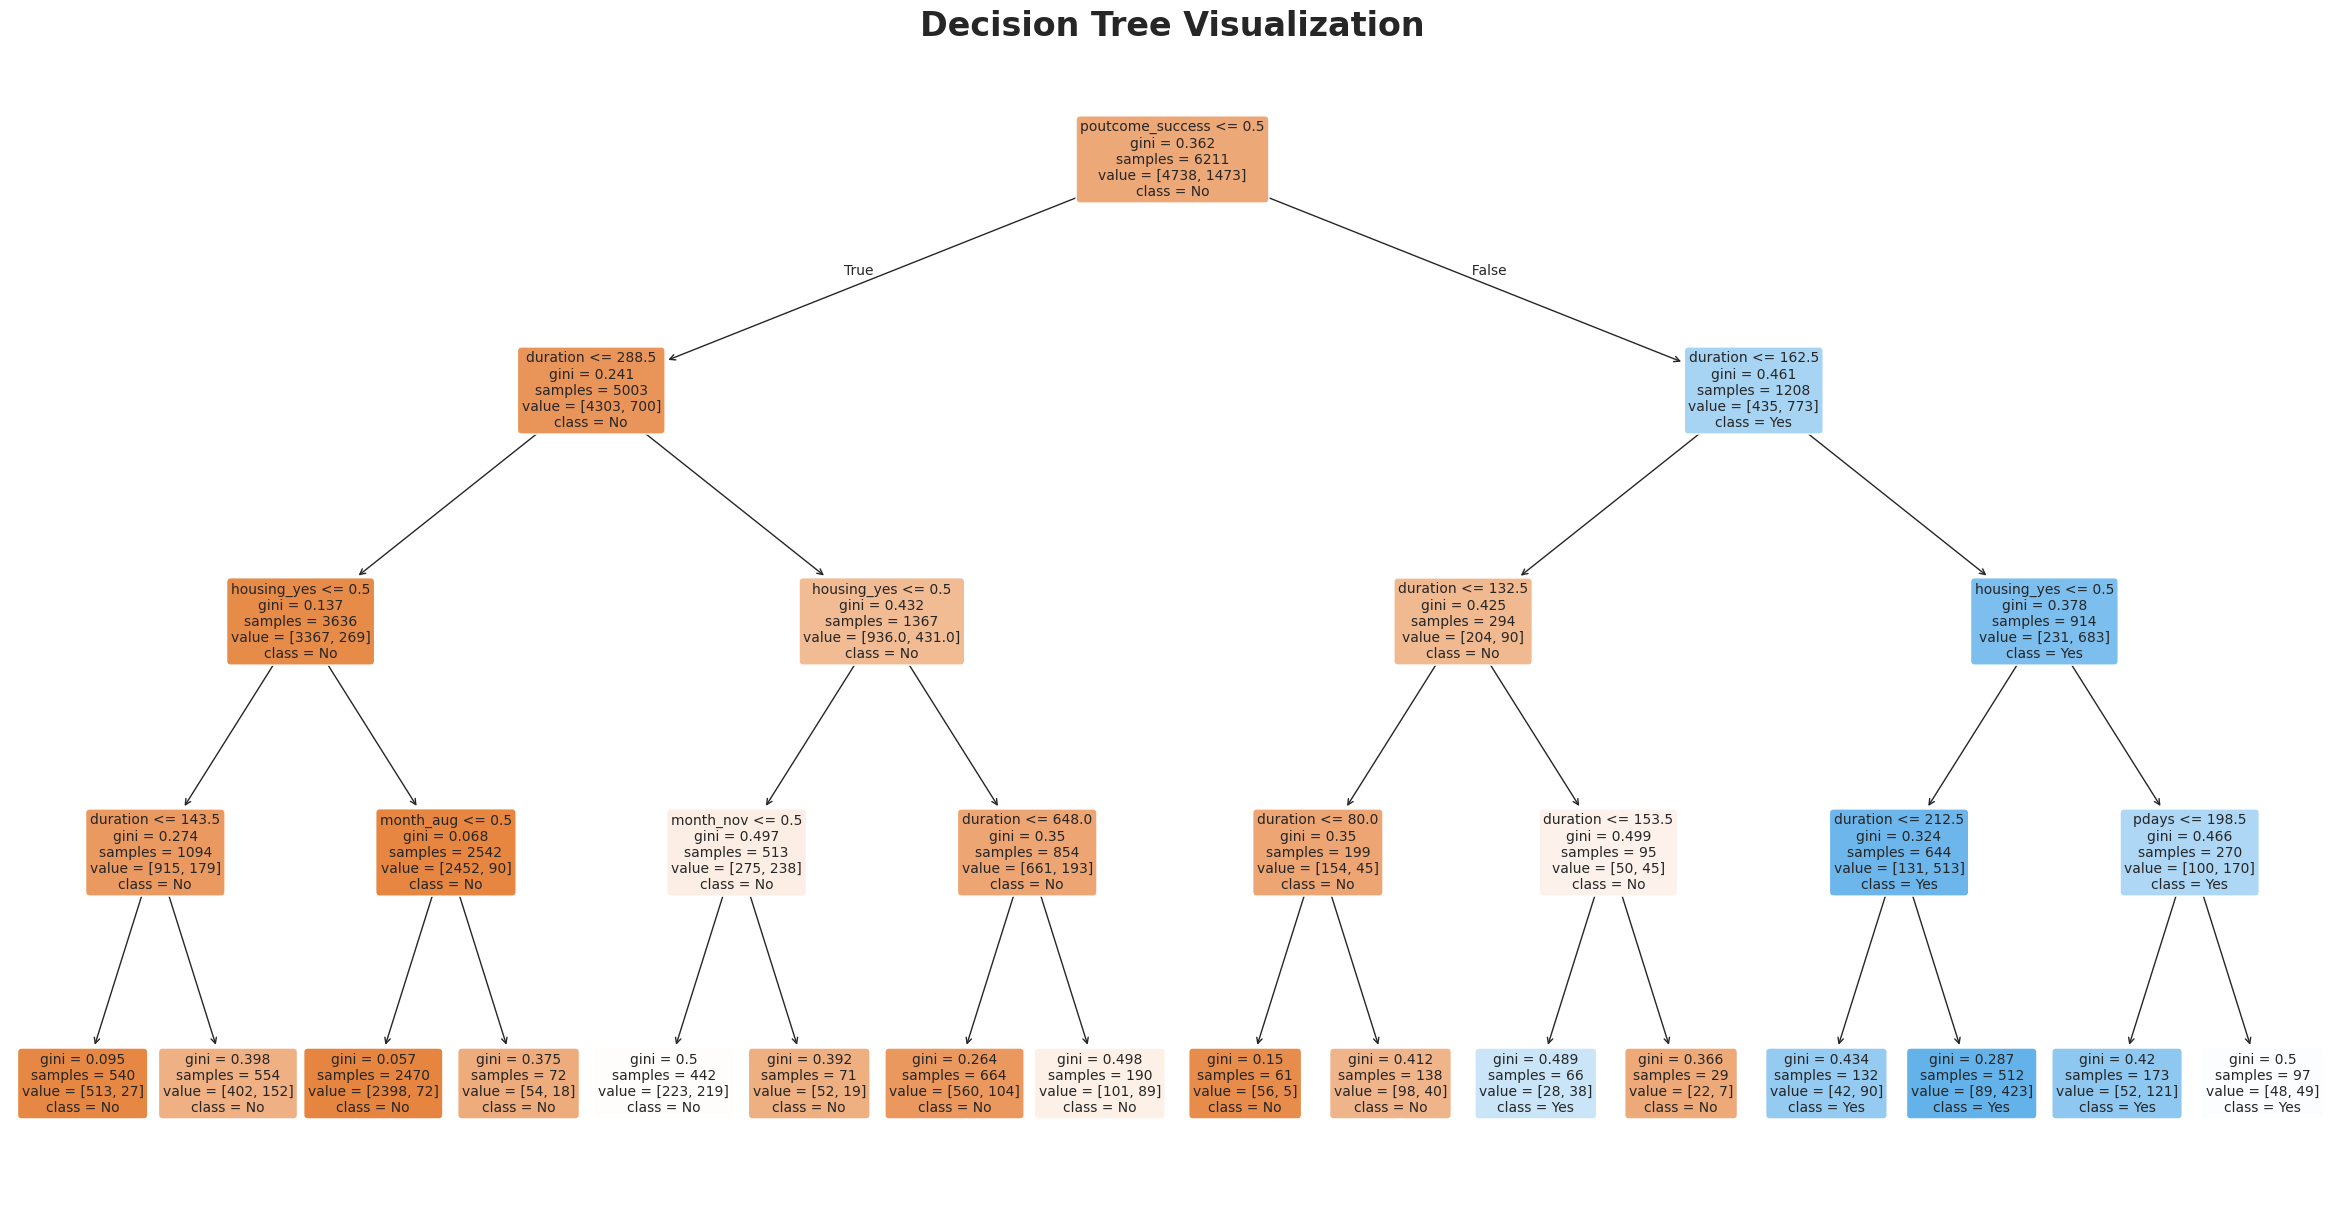

In [101]:
# Create and fit the Decision Tree Classifier
clas = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clas.fit(x_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(30, 15))  # Set the figure size
tree.plot_tree(
    clas,
    feature_names=x_train.columns,  # Column names as feature names
    class_names=["No", "Yes"],  # Target class names
    filled=True,  # Fill colors to indicate decision
    rounded=True,  # Rounded nodes for better visuals
    fontsize=10  # Font size for better readability
)

plt.title("Decision Tree Visualization", fontsize=24,fontweight='bold')
plt.show()


## **Insights :**

- **Primary Decision Factors :**

 - Duration of contact plays a significant role in determining the outcome (whether a client will subscribe to the term deposit or not). A longer duration increases the likelihood of a "Yes" outcome.

 - Previous outcome success and housing loan status are secondary significant factors influencing the decision path.


- **Customer Segmentation :**

 - Clients with shorter call durations (e.g., less than ~248.5 seconds) and those who previously did not succeed in a campaign are more likely to be classified as "No."

 - Certain months (e.g., November) show notable decision impact, indicating seasonality trends in successful subscriptions.

# **Conclusion :**


The decision tree analysis for the Bank Marketing dataset reveals key insights that can guide strategic decisions for improving the success rate of term deposit subscriptions. Among the various features analyzed, **call duration** emerges as the most significant factor. Clients with longer call durations are significantly more likely to subscribe to a term deposit, which underscores the importance of meaningful and engaging conversations during marketing calls. This finding suggests that the marketing team should focus on maintaining longer call durations with potential clients, as brief calls (e.g., less than 248.5 seconds) often lead to unsuccessful outcomes.

The **outcome of previous campaigns** is another critical factor. Clients who had a positive experience or success in earlier campaigns (indicated by the variable "poutcome_success") are more likely to respond positively to new marketing efforts. This indicates that nurturing relationships with previously successful clients could yield higher returns. It also highlights the importance of maintaining detailed and accurate records of past interactions and outcomes to effectively segment and target audiences.

The analysis further reveals the impact of client attributes, such as **housing loan status**. Clients without housing loans are more likely to subscribe to term deposits, potentially indicating a greater capacity or willingness to save and invest. This insight can help tailor marketing strategies and messaging to specific client segments. Additionally, **month-based seasonality** appears to play a role, with certain months (e.g., November) influencing the likelihood of success. Campaign timing should be optimized based on such patterns to align with periods of higher responsiveness.

In summary, the decision tree provides actionable recommendations for improving campaign outcomes. By prioritizing longer and more engaging client interactions, targeting clients with favorable past outcomes, and tailoring strategies based on client attributes and seasonal trends, the marketing team can significantly enhance the effectiveness of their efforts. These insights underscore the importance of leveraging data-driven strategies to refine marketing approaches and maximize the success of future campaigns.